In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import openpyxl


In [250]:
# 设置支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False} # 用来正常显示中文标签
# 设置学术化的图片风格
sns.set_style("whitegrid",rc=rc) #设置绘图风格
sns.set_palette("hls") #设置颜色主题
sns.set_context("paper") #设置绘图元素缩放比例

In [252]:
# 读取数据
data = pd.read_excel('data/data.xlsx')
data

,地市名称,会计年度,起草国家标准数,专利授权数量,人均GDP(元/人),当年实际使用外资金额（万美元）,标准研制贡献指数
0,南京市,2006-12-31,65,2566,40645,151911,59.5
1,南京市,2007-12-31,51,3519,46306,196253,46.4
2,南京市,2008-12-31,188,4531,51454,237203,215.4
3,南京市,2009-12-31,89,6242,56035,239199,97.0
4,南京市,2010-12-31,141,8637,66132,281601,101.8
...,...,...,...,...,...,...,...
216,宿迁市,2018-12-31,2,8443,57698,37684,2.6
217,宿迁市,2019-12-31,0,7857,62065,44556,0.4
218,宿迁市,2020-12-31,2,13971,65663,55578,1.0
219,宿迁市,2021-12-31,3,17079,77479,85231,6.0


In [253]:
#将城市名称类型转换为类别
data['地市名称'] = data['地市名称'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   地市名称             221 non-null    category      
 1   会计年度             221 non-null    datetime64[ns]
 2   起草国家标准数          221 non-null    int64         
 3   专利授权数量           221 non-null    int64         
 4   人均GDP(元/人)       221 non-null    int64         
 5   当年实际使用外资金额（万美元）  221 non-null    int64         
 6   标准研制贡献指数         221 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 11.3 KB


In [254]:
#年份转换为时间格式,只保留年份
data['会计年度'] = pd.to_datetime(data['会计年度'], format='%Y')
data

,地市名称,会计年度,起草国家标准数,专利授权数量,人均GDP(元/人),当年实际使用外资金额（万美元）,标准研制贡献指数
0,南京市,2006-12-31,65,2566,40645,151911,59.5
1,南京市,2007-12-31,51,3519,46306,196253,46.4
2,南京市,2008-12-31,188,4531,51454,237203,215.4
3,南京市,2009-12-31,89,6242,56035,239199,97.0
4,南京市,2010-12-31,141,8637,66132,281601,101.8
...,...,...,...,...,...,...,...
216,宿迁市,2018-12-31,2,8443,57698,37684,2.6
217,宿迁市,2019-12-31,0,7857,62065,44556,0.4
218,宿迁市,2020-12-31,2,13971,65663,55578,1.0
219,宿迁市,2021-12-31,3,17079,77479,85231,6.0


In [255]:
data['Year'] = pd.to_datetime(data['会计年度'])
data['City'] = data['地市名称']
data.set_index(['City', 'Year'], inplace=True)
data.drop(['会计年度', '地市名称'], axis=1, inplace=True)
data

起草国家标准数  专利授权数量  人均GDP(元/人)  当年实际使用外资金额（万美元）  标准研制贡献指数
City Year                                                              
南京市  2006-12-31       65    2566       40645           151911      59.5
     2007-12-31       51    3519       46306           196253      46.4
     2008-12-31      188    4531       51454           237203     215.4
     2009-12-31       89    6242       56035           239199      97.0
     2010-12-31      141    8637       66132           281601     101.8
...                  ...     ...         ...              ...       ...
宿迁市  2018-12-31        2    8443       57698            37684       2.6
     2019-12-31        0    7857       62065            44556       0.4
     2020-12-31        2   13971       65663            55578       1.0
     2021-12-31        3   17079       77479            85231       6.0
     2022-12-31        0   12013       82567           117602       3.1

[221 rows x 5 columns]

In [256]:
data.columns = ['STA','TIP','ECO','FDI','SDC']
data

STA    TIP    ECO     FDI    SDC
City Year                                        
南京市  2006-12-31   65   2566  40645  151911   59.5
     2007-12-31   51   3519  46306  196253   46.4
     2008-12-31  188   4531  51454  237203  215.4
     2009-12-31   89   6242  56035  239199   97.0
     2010-12-31  141   8637  66132  281601  101.8
...              ...    ...    ...     ...    ...
宿迁市  2018-12-31    2   8443  57698   37684    2.6
     2019-12-31    0   7857  62065   44556    0.4
     2020-12-31    2  13971  65663   55578    1.0
     2021-12-31    3  17079  77479   85231    6.0
     2022-12-31    0  12013  82567  117602    3.1

[221 rows x 5 columns]

In [257]:
data.to_csv('data/data_raw.csv')

In [236]:
#零值检测,将零值替换为缺失值
zero = data[data==0].count()
#将零值替换为缺失值
data = data.replace(0,np.nan)
zero

STA    10
TIP     0
ECO     0
FDI     0
SDC     2
dtype: int64

In [237]:
#异常值检测,将异常值替换为缺失值,采用3σ原则
for i in range(5):
    mean = data.iloc[:,i].mean()
    std = data.iloc[:,i].std()
    data.iloc[:,i] = data.iloc[:,i].map(lambda x: x if (x-mean)/std<3 else np.nan)
    
missing = data.isnull().sum()
missing


C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\1776837490.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'City  Year      
南京市   2006-12-31     2566.0
      2007-12-31     3519.0
      2008-12-31     4531.0
      2009-12-31     6242.0
      2010-12-31     8637.0
                     ...   
宿迁市   2018-12-31     8443.0
      2019-12-31     7857.0
      2020-12-31    13971.0
      2021-12-31    17079.0
      2022-12-31    12013.0
Name: TIP, Length: 221, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:,i] = data.iloc[:,i].map(lambda x: x if (x-mean)/std<3 else np.nan)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\1776837490.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'City  Year      
南京市   2006-12-31    151911.0
      2007-12-31    196253.0
      

STA    16
TIP     3
ECO     0
FDI     7
SDC     7
dtype: int64

In [238]:
#缺失值处理,随机森林填充缺失值
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 填充缺失值的函数
def fill_missing_rf(X):
    # 创建包含所有列的数据框
    complete_data = data.drop(columns=[X.name]).copy()
    known_X = complete_data[X.notna()]
    known_y = X.dropna()
    missing_X = complete_data[X.isna()]
    
    if missing_X.empty:
        return X
    
    rfr = RandomForestRegressor(n_estimators=100)
    rfr.fit(known_X, known_y)
    
    predicted_y = rfr.predict(missing_X)
    
    X[X.isna()] = predicted_y
    return X

# 对每列应用填充函数
for col in ['TIP', 'ECO', 'FDI', 'STA','SDC']:
    if data[col].isna().sum() > 0:
        data[col] = fill_missing_rf(data[col])

missing = data.isnull().sum()
missing


C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\3401183745.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.isna()] = predicted_y
C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\3401183745.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.isna()] = predicted_y
C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\3401183745.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.isna()] = predict

STA    0
TIP    0
ECO    0
FDI    0
SDC    0
dtype: int64

In [246]:
#缺失值处理,随机森林填充缺失值
for col in ['TIP', 'ECO', 'FDI', 'STA','SDC']:
    if data[col].isna().sum() > 0:
        data[col] = fill_missing_rf(data[col])
        
#异常值处理,将异常值替换为缺失值,采用3σ原则
for i in range(5):
    mean = data.iloc[:,i].mean()
    std = data.iloc[:,i].std()
    data.iloc[:,i] = data.iloc[:,i].map(lambda x: x if (x-mean)/std<3 else np.nan)
    
missing = data.isnull().sum()
missing

C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\3401183745.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.isna()] = predicted_y


STA    0
TIP    0
ECO    0
FDI    0
SDC    0
dtype: int64

In [247]:
#只保留整数,四舍五入
data = data.round(1)
data['STA'] = data['STA'].astype('int')
data['TIP'] = data['TIP'].astype('int')
data['ECO'] = data['ECO'].astype('int')
data['FDI'] = data['FDI'].astype('int')
data

STA    TIP    ECO     FDI    SDC
City Year                                        
南京市  2006-12-31    7   2566  40645  151911   59.5
     2007-12-31   23   3519  46306  196253   46.4
     2008-12-31   90   4531  51454  237203  102.7
     2009-12-31   85   6242  56035  239199   97.0
     2010-12-31   66   8637  66132  281601  101.8
...              ...    ...    ...     ...    ...
宿迁市  2018-12-31    3   8443  57698   37684    2.6
     2019-12-31    4   7857  62065   44556    0.4
     2020-12-31    4  13971  65663   55578    1.0
     2021-12-31   10  17079  77479   85231    6.0
     2022-12-31    9  12013  82567  117602    3.1

[221 rows x 5 columns]

In [248]:
data.to_csv('data/data.csv')

<Figure size 1200x600 with 0 Axes>

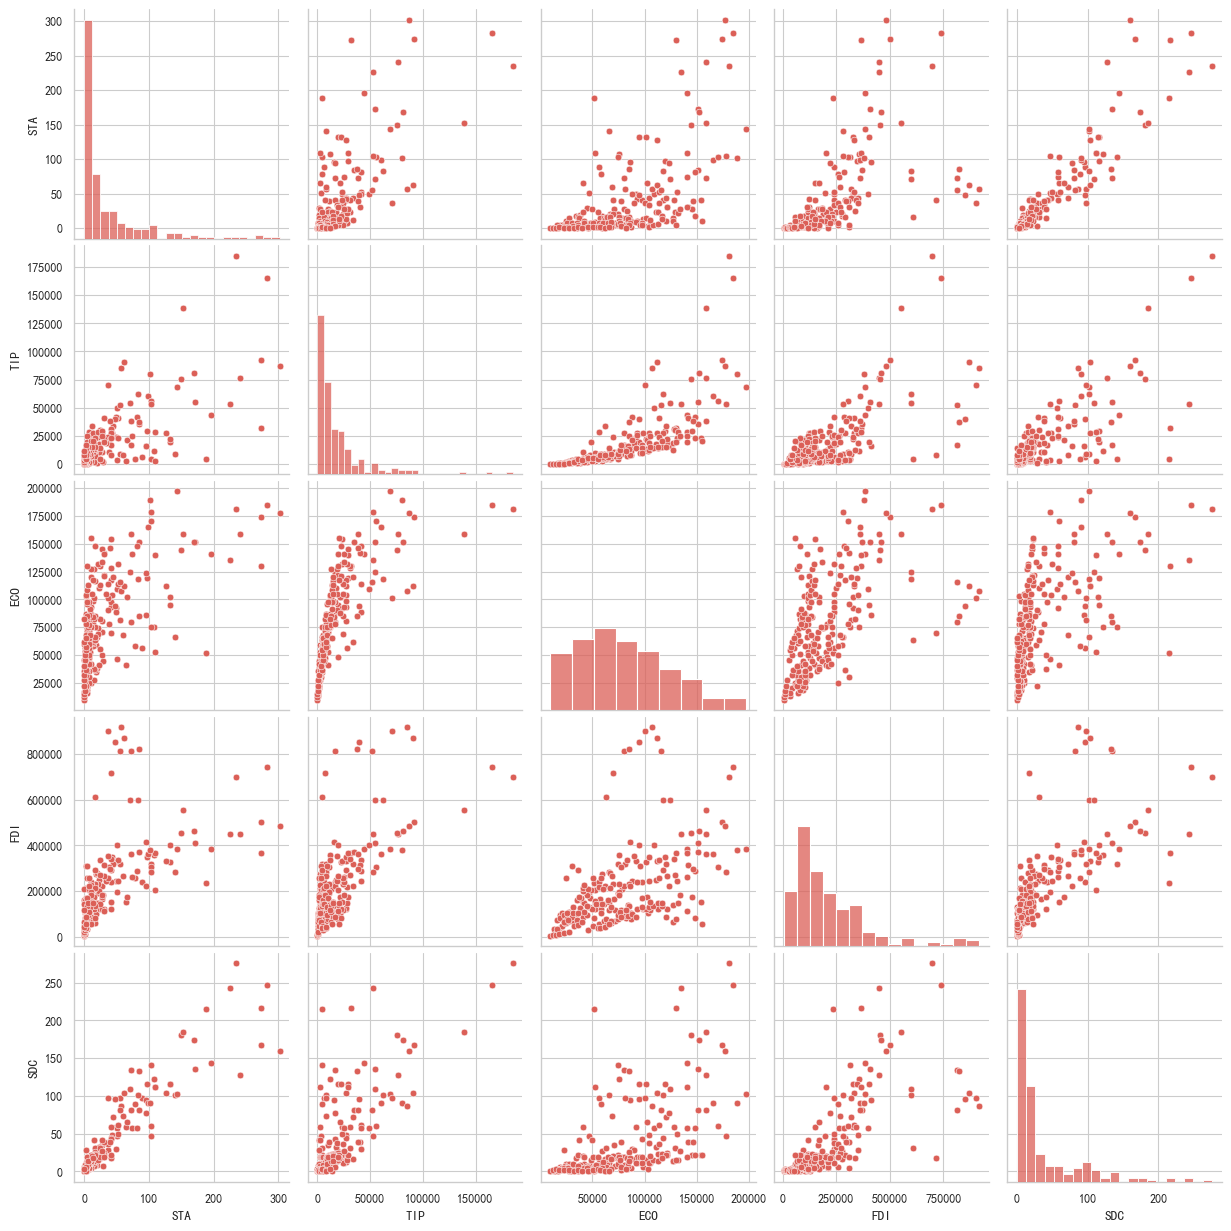

In [258]:
#绘制各地市的直立图
plt.figure(figsize=(12,6))
sns.pairplot(data)
plt.show()


<Axes: >

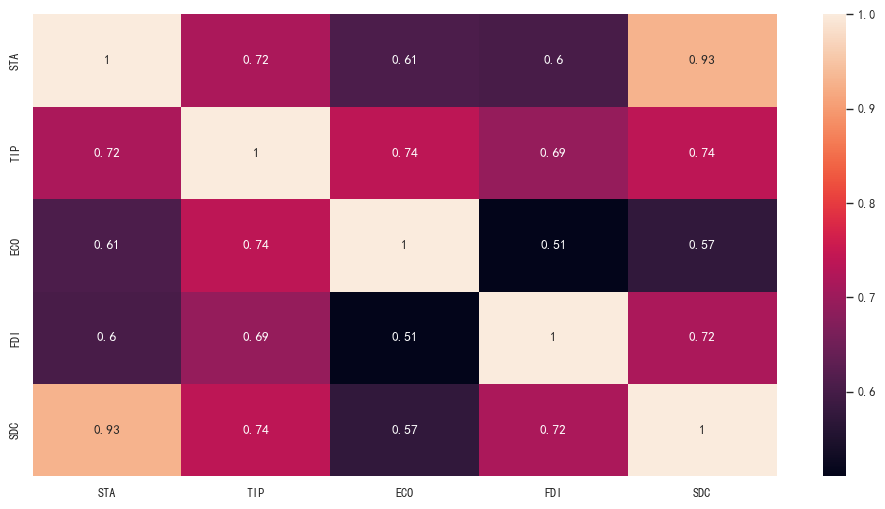

In [259]:
#特征值的相关性
corr = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)


In [144]:
#显著性检验
from scipy.stats import ttest_ind
p1 = ttest_ind(data['STA'],data['TIP']).pvalue
p2 = ttest_ind(data['STA'],data['ECO']).pvalue
p3 = ttest_ind(data['STA'],data['FDI']).pvalue
p4 = ttest_ind(data['TIP'],data['ECO']).pvalue
p5 = ttest_ind(data['TIP'],data['FDI']).pvalue
p6 = ttest_ind(data['ECO'],data['FDI']).pvalue
p7 = ttest_ind(data['STA'],data['SDC']).pvalue
p8 = ttest_ind(data['TIP'],data['SDC']).pvalue
p9 = ttest_ind(data['ECO'],data['SDC']).pvalue
p10 = ttest_ind(data['FDI'],data['SDC']).pvalue

    
if p1<0.05:
    print('STA和TIP有显著性差异')
if p2<0.05:
    print('STA和ECO有显著性差异')
if p3<0.05:
    print('STA和FDI有显著性差异')
if p4<0.05:
    print('TIP和ECO有显著性差异')
if p5<0.05:
    print('TIP和FDI有显著性差异')
if p6<0.05:
    print('ECO和FDI有显著性差异')
if p7<0.05:
    print('STA和SDC有显著性差异')
if p8<0.05:
    print('TIP和SDC有显著性差异')
if p9<0.05:
    print('ECO和SDC有显著性差异')
if p10<0.05:
    print('FDI和SDC有显著性差异')
    
    
    

STA和TIP有显著性差异
STA和ECO有显著性差异
STA和FDI有显著性差异
TIP和ECO有显著性差异
TIP和FDI有显著性差异
ECO和FDI有显著性差异
TIP和SDC有显著性差异
ECO和SDC有显著性差异
FDI和SDC有显著性差异


In [145]:
#偏度和峰度
skew = data.skew()
kurt = data.kurt()
#判断偏态程度,偏度绝对值大于标准误差2时，认为是中度偏态，绝对值大于3时，认为是重度偏态
#判断峰态程度，峰度大于0时，为尖峰，小于0时，为平峰
skew_std=6/np.sqrt(len(data))
kurt_std=24/len(data)
for i in range(5):
    if abs(skew[i])>skew_std:
        print(data.columns[i],'中度偏态')
    if abs(skew[i])>3:
        print(data.columns[i],'重度偏态')
    if kurt[i]>kurt_std:
        print(data.columns[i],'尖峰')
    if kurt[i]<0:
        print(data.columns[i],'平峰')
        
    
    

STA 中度偏态
STA 尖峰
TIP 中度偏态
TIP 尖峰
ECO 中度偏态
ECO 平峰
FDI 中度偏态
FDI 尖峰
SDC 中度偏态
SDC 尖峰


C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\2901663360.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(skew[i])>skew_std:
C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\2901663360.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(skew[i])>3:
C:\Users\Administrator\AppData\Local\Temp\ipykernel_35176\2901663360.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if kurt[i]>kurt_std:
C:\Us

In [146]:
#零值检测
zero = data[data==0].count()
zero

STA    15
TIP     0
ECO     0
FDI     0
SDC     2
dtype: int64

In [147]:
#进行对数变换
data_log = np.log1p(data)
data_log


STA       TIP        ECO        FDI       SDC
City Year                                                          
南京市  2006-12-31  4.189655  7.850493  10.612656  11.931057  4.102643
     2007-12-31  3.951244  8.166216  10.743048  12.187165  3.858622
     2008-12-31  5.241747  8.418919  10.848463  12.376676  4.948050
     2009-12-31  4.499810  8.739216  10.933750  12.385055  4.584967
     2010-12-31  4.955827  9.063926  11.099423  12.548250  4.632785
...                   ...       ...        ...        ...       ...
宿迁市  2018-12-31  1.098612  9.041211  10.962995  10.537017  1.280934
     2019-12-31  0.000000  8.969287  11.035954  10.704525  0.336472
     2020-12-31  1.098612  9.544811  11.092306  10.925561  0.693147
     2021-12-31  1.386294  9.745663  11.257775  11.353132  1.945910
     2022-12-31  0.000000  9.393828  11.321377  11.675070  1.410987

[221 rows x 5 columns]

<Figure size 1200x600 with 0 Axes>

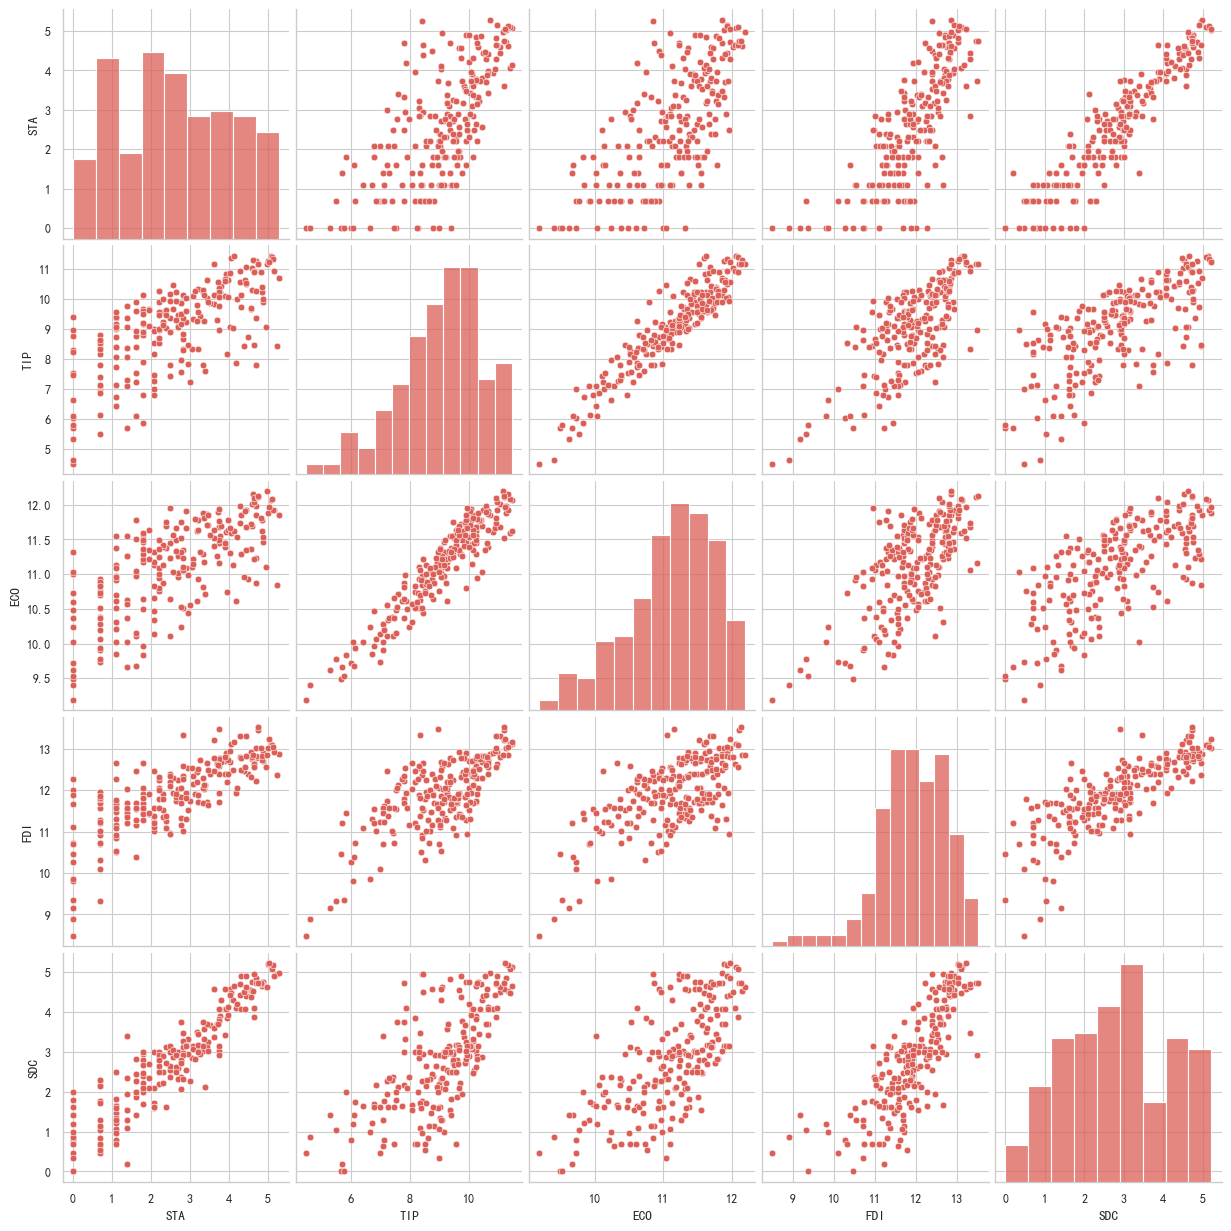

In [148]:
#绘制差分后的图
plt.figure(figsize=(12,6))
sns.pairplot(data_log)


In [149]:
#平稳性检验
from statsmodels.tsa.stattools import adfuller
for i in range(5):
    result = adfuller(data_log.iloc[:,i])
    if result[1]<0.05:
        print(data_log.columns[i],'平稳')
    else:
        print(data_log.columns[i],'非平稳')
        

STA 非平稳
TIP 非平稳
ECO 非平稳
FDI 平稳
SDC 非平稳


In [150]:
#差分
data_diff = data.diff().dropna()
data_diff

STA     TIP      ECO      FDI   SDC
City Year                                             
南京市  2007-12-31  -14.0   953.0   5661.0  44342.0 -13.1
     2008-12-31  137.0  1012.0   5148.0  40950.0  93.5
     2009-12-31  -99.0  1711.0   4581.0   1996.0 -42.9
     2010-12-31   52.0  2395.0  10097.0  42402.0   4.8
     2011-12-31  -33.0  2997.0   9438.0  74987.0  20.4
...                ...     ...      ...      ...   ...
宿迁市  2018-12-31    0.0  4079.0   2733.0   1330.0  -1.3
     2019-12-31   -2.0  -586.0   4367.0   6872.0  -2.2
     2020-12-31    2.0  6114.0   3598.0  11022.0   0.6
     2021-12-31    1.0  3108.0  11816.0  29653.0   5.0
     2022-12-31   -3.0 -5066.0   5088.0  32371.0  -2.9

[220 rows x 5 columns]

<Figure size 1200x600 with 0 Axes>

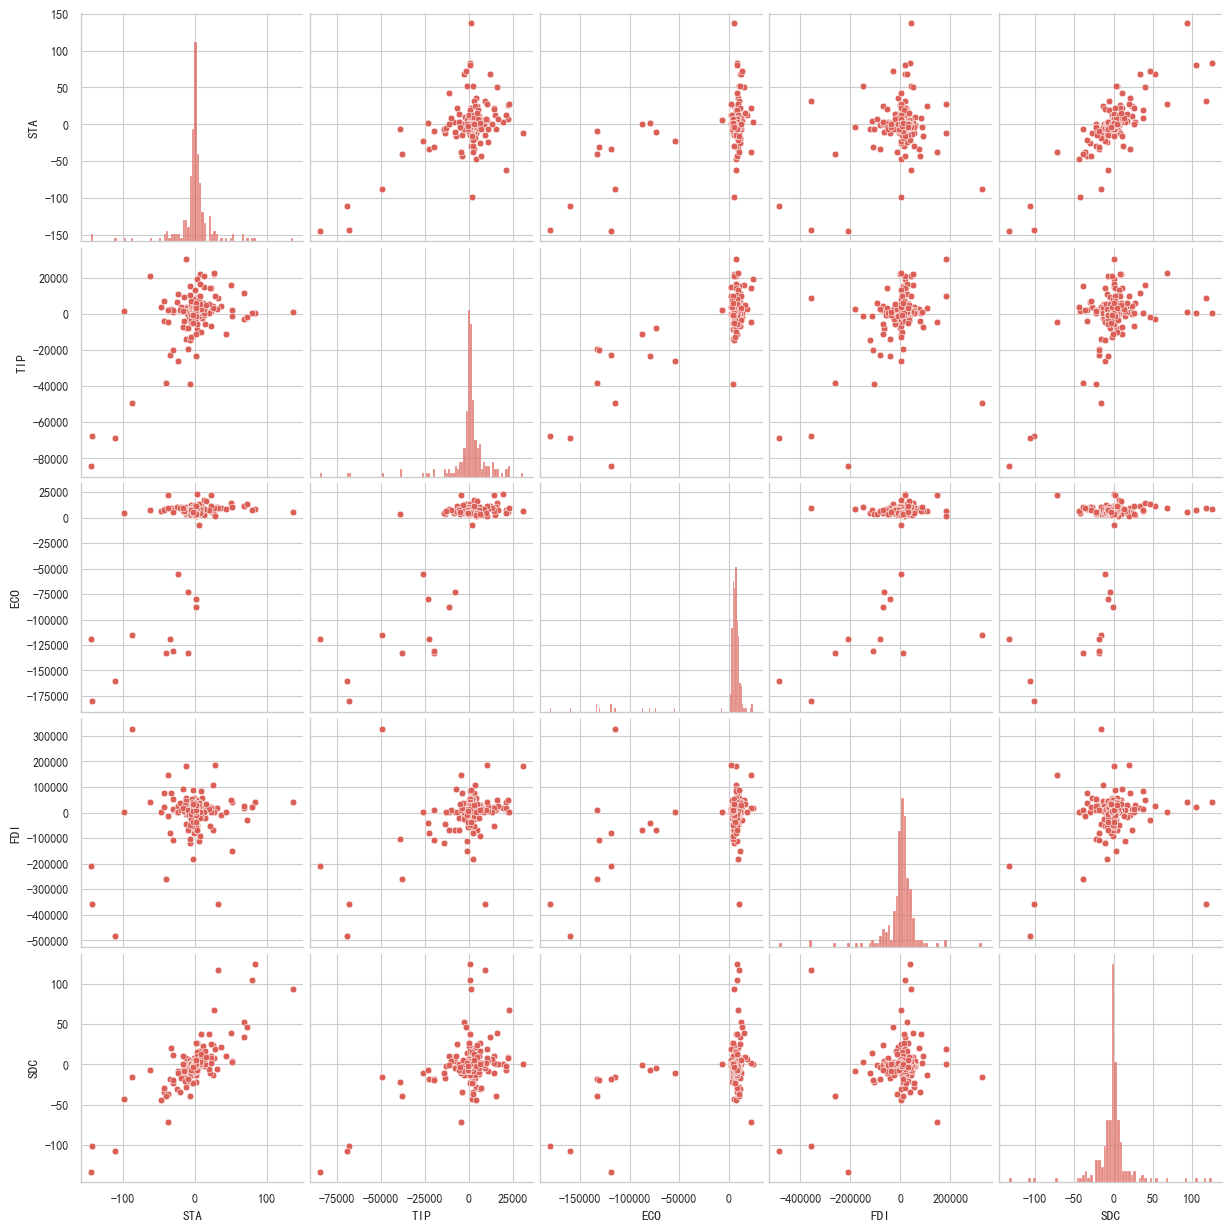

In [151]:
#绘制差分后的图
plt.figure(figsize=(12,6))
sns.pairplot(data_diff)

In [152]:
#平稳性检验
from statsmodels.tsa.stattools import adfuller
for i in range(5):
    result = adfuller(data_diff.iloc[:,i])
    if result[1]<0.05:
        print(data_diff.columns[i],'平稳')
    else:
        print(data_diff.columns[i],'非平稳')
        

STA 平稳
TIP 平稳
ECO 平稳
FDI 平稳
SDC 平稳


In [153]:
#保存数据
data_log.to_csv('data/data_log.csv')
data_diff.to_csv('data/data_diff.csv')
